# Step 1 Import the Libraries and Read in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import seaborn as sns
from my_func import *

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data_cleaned.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,1800,7503


# Step 2 Explore the Data

### Step 2.1 Descibe the Data

In [3]:
# get the summary
desc_df = df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df.round(2)
#desc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1788.60,285.72,1971.00,98077.95,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.65,1.17,827.76,439.82,29.38,53.51,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,370.00,0.00,1900.00,98001.00,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1190.00,0.00,1951.00,98033.00,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,0.00,1975.00,98065.00,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,2210.00,550.00,1997.00,98118.00,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,9410.00,4820.00,2015.00,98199.00,6210.00,871200.00
+3_std,1642400.99,6.15,4.42,4834.64,139337.32,3.11,0.25,5.36,11.18,4271.88,1605.18,2059.13,98238.49,4042.31,94581.61
-3_std,-561807.85,0.59,-0.19,-674.00,-109138.50,-0.12,-0.24,1.46,4.14,-694.68,-1033.74,1882.87,97917.41,-69.07,-69065.04


#### Analysis

There are a considerable number of outliers in the data that will have an effect on the output of our linear regression models. The extremity of the outliers can be seen by looking at the max value and comparing it to the + or - 3 standard devation value. 

### Step 2.2 Visualize the Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,True,False,True,True,False,False,False,False,True,True,False,False,False,True,False
bedrooms,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False
bathrooms,True,True,True,True,False,True,False,False,True,True,False,True,False,True,False
sqft_living,True,True,True,True,False,False,False,False,True,True,True,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
floors,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,True,False,True,True,False,True,False,False,True,True,False,True,False,True,False
sqft_above,True,True,True,True,False,True,False,False,True,True,False,True,False,True,False


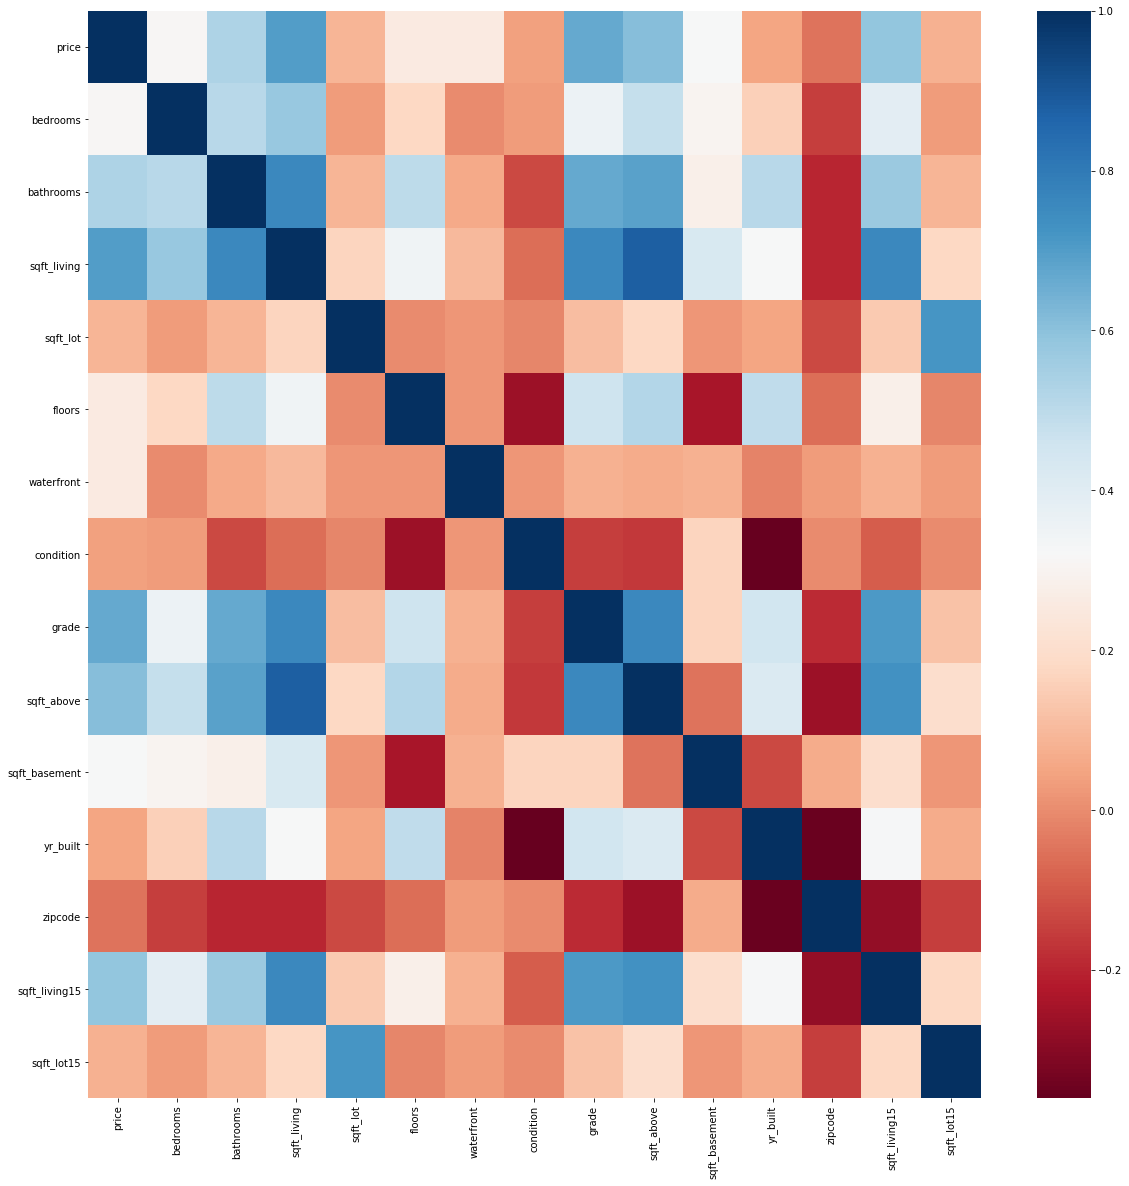

In [4]:
# calculate the correlation matrix
corr = df.corr().round(2)

# display the correlation matrix
plt.figure(figsize=(20,20))
display(corr > .4)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')


In [5]:
corr.price.sort_values(ascending=False)[1:]

sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
sqft_basement    0.32
bedrooms         0.31
waterfront       0.26
floors           0.26
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
zipcode         -0.05
Name: price, dtype: float64

### Scatter Matrix

In [6]:
# define the plot
#pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

### Temmporary/Testing

In [7]:
zipcode_df = df.groupby(['zipcode'])
zipcode_df.std().sort_values(['price'],ascending=False)[:10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,
98039,1.166904e+06,0.890081,1.366509,1764.502500,6655.224175,0.501427,0.141421,0.579937,1.655664,1595.431517,714.842640,25.557650,701.535604,5957.568571
98102,7.903814e+05,1.146967,0.936100,1416.956148,3738.541805,0.535084,0.000000,0.641411,1.283804,1034.478508,496.459644,43.927591,592.328447,1875.940893
98004,7.460941e+05,0.976504,0.950634,1308.368630,6441.120122,0.516475,0.056166,0.619419,1.460538,1140.285874,633.315534,23.533908,743.307049,5294.473819
98040,6.077676e+05,0.859887,0.891947,1183.141017,7197.254905,0.522593,0.193956,0.698840,1.299563,953.751227,710.641063,17.577512,649.553780,3881.485489
98112,5.942232e+05,1.128377,0.907735,1118.442413,3129.238251,0.521722,0.000000,0.765815,1.203783,906.652855,479.411446,37.965448,789.077587,2085.339018
98105,4.778332e+05,1.363296,0.795222,954.336464,3311.876473,0.528048,0.113954,0.765053,1.106246,735.559880,433.979437,30.118715,655.124950,2695.410967
98033,4.628349e+05,0.829328,0.811419,1025.765907,7916.056192,0.492978,0.083140,0.681061,1.343955,917.855218,492.492947,23.145064,625.415000,5995.938413
98109,4.557008e+05,0.957205,0.850967,906.908825,1692.662740,0.621870,0.000000,0.740324,1.122016,683.522161,423.619964,39.750252,568.800743,1276.037972
98006,4.462724e+05,0.863370,0.806651,1170.730518,8772.702828,0.499893,0.089351,0.720451,1.362850,1036.450856,636.470466,16.944946,891.372362,6117.941375


## 2.3 Numerical Data

### 2.3.1 Removing Extreme Outliers

In [8]:
# filter the data frame to remove the values exceeding 3 standard deviations
# Remove the extreme 0.03% of data
#df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]


#preserve original df
transformed_df = df

### 2.3.2 Address Positive Skew - Price

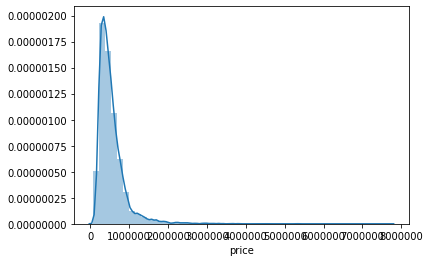

In [9]:
#view distribution of prices
sns.distplot(df.price)

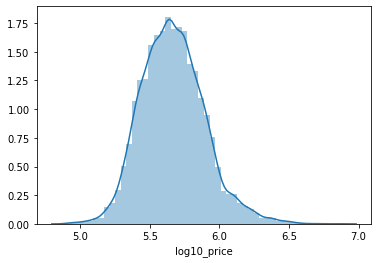

In [10]:
#create new column with log distributed values
transformed_df['log10_price'] = np.log10(df.price)

#check distribution of values
sns.distplot(transformed_df.log10_price)

### 2.3.3 Confirming Skewness and Kurtosis Values for Price

In [11]:
#scipy.stats.skew
print('Before Log Transform Skewness: ',skew(transformed_df.price)) 
print('After Log Transform Skewness: ',skew(transformed_df.log10_price)) 

Before Log Transform Skewness:  4.023085207745834
After Log Transform Skewness:  0.43097424174908605


In [12]:
#scipy.stats.kurtosis
print('Before Log Transform Kurtosis: ',kurtosis(transformed_df['price'], fisher = True))
print('After Log Transform Kurtosis: ',kurtosis(transformed_df['log10_price'], fisher = True))

Before Log Transform Kurtosis:  34.53308449607733
After Log Transform Kurtosis:  0.6906107356267661


**Kurtosis**
- Any distribution with **kurtosis ≈3 (excess ≈0)** is called mesokurtic. This is a normal distribution
- Any distribution with **kurtosis <3 (excess kurtosis <0)** is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
- Any distribution with **kurtosis >3 (excess kurtosis >0)** is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.

***

**Skewness**
- If skewness is **less than −1 or greater than +1**, the distribution is highly skewed.
- If skewness is **between −1 and −½ or between +½ and +1**, the distribution is moderately skewed.
- If skewness is **between −½ and +½**, the distribution is approximately symmetric.

### 2.3.4 Address Positive Skew - Sqft_Living

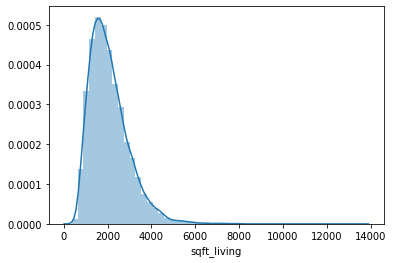

In [13]:
sns.distplot(transformed_df.sqft_living)


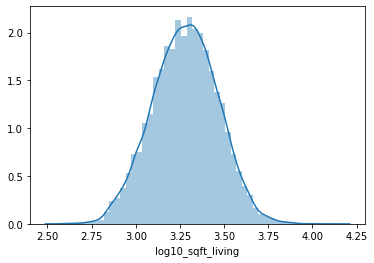

In [14]:
#create new column with log distributed values
transformed_df['log10_sqft_living'] = np.log10(df.sqft_living)

#check distribution of values
sns.distplot(transformed_df.log10_sqft_living)


### 2.3.5 Confirming Skewness and Kurtosis Values for Sqft_Living

In [15]:
#scipy.stats.skew
print('Before Log Transform Skewness: ',skew(transformed_df.sqft_living))
print('After Log Transform Skewness: ',skew(transformed_df.log10_sqft_living))

Before Log Transform Skewness:  1.4731131326116373
After Log Transform Skewness:  -0.0273600693394441


In [16]:
#scipy.stats.kurtosis
print('Before Log Transform Kurtosis: ',kurtosis(transformed_df['price'], fisher = True))
print('After Log Transform Kurtosis: ',kurtosis(transformed_df['log10_price'], fisher = True))

Before Log Transform Kurtosis:  34.53308449607733
After Log Transform Kurtosis:  0.6906107356267661


**Kurtosis**
- Any distribution with **kurtosis ≈3 (excess ≈0)** is called mesokurtic. This is a normal distribution
- Any distribution with **kurtosis <3 (excess kurtosis <0)** is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
- Any distribution with **kurtosis >3 (excess kurtosis >0)** is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.

***

**Skewness**
- If skewness is **less than −1 or greater than +1**, the distribution is highly skewed.
- If skewness is **between −1 and −½ or between +½ and +1**, the distribution is moderately skewed.
- If skewness is **between −½ and +½**, the distribution is approximately symmetric.

## 2.4 Categorical Data

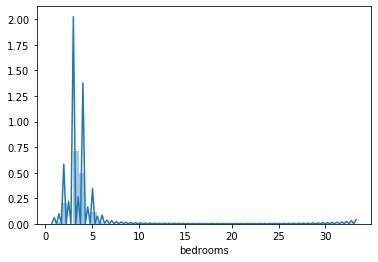

In [17]:
transformed_df['bedrooms'] = df['bedrooms']  

sns.distplot(transformed_df['bedrooms'])

Number of zipcodes in total:  70
----------------------------------------------------------------------------------------------------
98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
Name: zipcode, dtype: int64


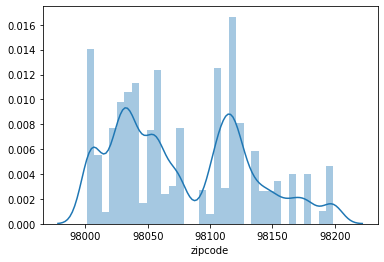

In [18]:
transformed_df['zipcode'] = df.zipcode

print('Number of zipcodes in total: ',len(transformed_df.zipcode.unique()))
print('-'*100)
print(transformed_df.zipcode.value_counts().sort_values(ascending=False)[:10])
sns.distplot(transformed_df.zipcode)

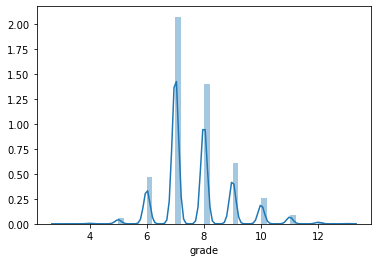

In [19]:
sns.distplot(df.grade)

In [20]:
df.waterfront.value_counts()
#transformed_df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [21]:
transformed_df = pd.get_dummies(transformed_df, columns=['zipcode'], drop_first=True)

In [22]:
transformed_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15', 'log10_price',
       'log10_sqft_living', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipc

In [23]:
columns_to_be_dropped = ['price','sqft_living','bathrooms','bedrooms','sqft_lot','floors','condition','grade','sqft_living15','sqft_lot15','sqft_above',
                         'sqft_basement','yr_built']
final_df = transformed_df.drop(columns=columns_to_be_dropped)

In [24]:
#columns that remain
set(final_df.columns)

{'log10_price',
 'log10_sqft_living',
 'waterfront',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_9

In [25]:
# the VIFdoes expect a constant term in the data, so we need to add one using the add_constant method
x_1 = sm.tools.add_constant(final_df.drop(columns='log10_price'))
#X2 = sm.tools.add_constant(df_iter_1)

# create the series for both
vif_check_df = pd.Series([variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])], index=x_1.columns)

# display the series to find vaues greater than 5
display(vif_check_df.round(2).loc[vif_check_df > 5])

const    448.39
dtype: float64

In [26]:
final_df.to_csv('linreg_ready_data.csv',index=False)

In [27]:
final_df.shape

(21597, 72)